In [16]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
from zipfile import ZipFile
from visualizations import plot_geopandas, plot_correlation, plot_pie
from matplotlib import pyplot as plt
from pns_dict import PNS_DICT
from constants import BRAZIL_IDH

PNS_DATA = Path('../data/processed/PNS_2019/all.zip').resolve()
zip_pns = ZipFile(PNS_DATA)
df = pd.read_csv(zip_pns.open(zip_pns.namelist()[0]), sep=",", low_memory=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
PNS_DICT.df

,index,origin,desc,pv
0,uf,V0001,Unidade da Federação,"{11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 1..."
1,moradores,V0022,Total de moradores,{}
2,tipo_zona,V0026,Tipo de situação censitária,"{1: 'Urbano', 2: 'Rural'}"
3,renda_pc,VDF004,Faixa de rendimento domiciliar per capita (exc...,"{1: 'Até ¼ salário mínimo', 2: 'Mais de ¼ até ..."
4,casa_tipo,A001,Tipo do domicílio,"{1: 'Casa', 2: 'Apartamento', 3: 'Habitação em..."
5,casa_animal,A02201,"Em seu domicílio, há algum animal de estimação","{1: 'Sim', 2: 'Não', 9: 'Ignorado'}"
6,cad_sus,B001,O seu domicílio está cadastrado na unidade de ...,"{1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignora..."
7,sexo,C006,Sexo,"{1: 'Homem', 2: 'Mulher'}"
8,idade,C008,Idade do morador na data de referência,{}
9,cor,C009,Cor ou raça,"{1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Pa..."


In [4]:
df

,uf,moradores,tipo_zona,renda_pc,casa_tipo,casa_animal,cad_sus,sexo,idade,cor,...,freq_verde_sem,freq_carne_vermelha_sem,freq_frango_sem,freq_peixe_sem,freq_fruta_sem,freq_fruta_dia,freq_leite_sem,teve_depre,phq9_total,depression_severity
0,31,2,1,6.0,1,1,1,2,61,1,...,7,3,1,1,7,1.0,5,2,NaN,NaN
1,41,1,1,6.0,2,1,3,2,55,1,...,7,4,4,1,7,2.0,0,2,7.0,2.0
2,25,2,2,3.0,1,1,1,1,68,4,...,0,5,2,0,0,NaN,0,2,NaN,NaN
3,42,4,1,3.0,1,1,1,1,60,1,...,5,2,3,3,2,NaN,3,2,NaN,NaN
4,12,2,1,1.0,1,2,3,2,55,4,...,2,6,1,0,0,NaN,0,1,21.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,13,5,1,1.0,1,2,1,2,23,1,...,1,0,3,7,2,NaN,5,2,5.0,2.0
90842,32,5,1,4.0,2,1,1,1,42,1,...,7,4,3,1,7,1.0,0,2,0.0,1.0
90843,43,1,1,7.0,2,1,2,1,55,1,...,6,6,1,1,7,1.0,4,2,0.0,1.0
90844,11,2,1,6.0,1,1,3,2,41,4,...,7,7,1,0,3,NaN,0,2,9.0,2.0


# Caracterização dos dados

In [5]:
print("O dataset PNS possui {} linhas e {} colunas (features).".format(*df.shape))

O dataset PNS possui 90846 linhas e 26 colunas (features).


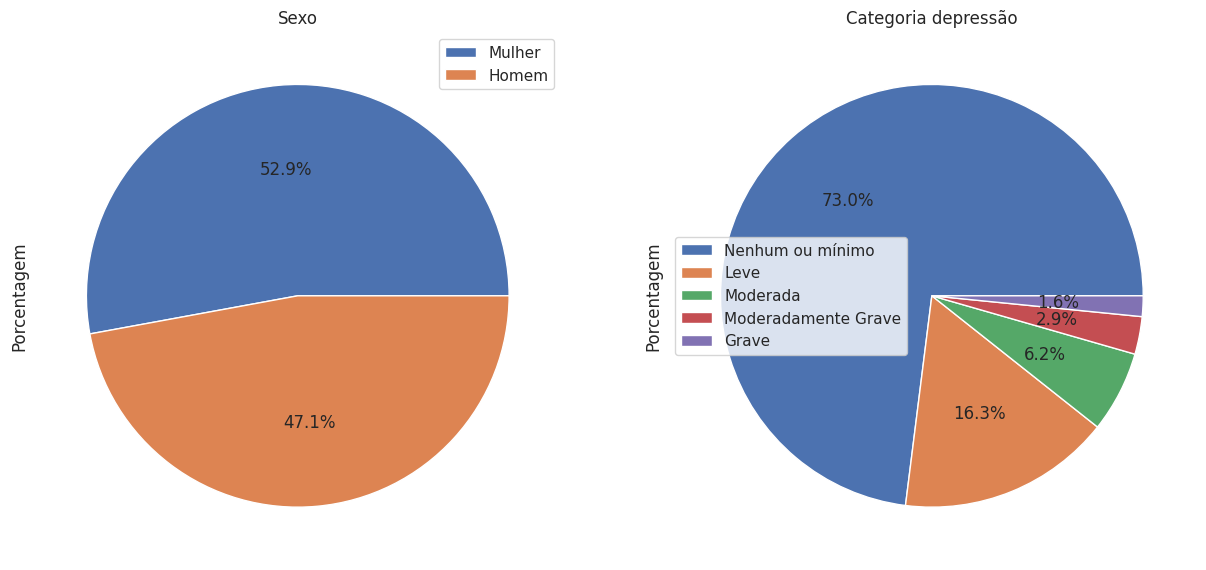

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_pie(df, 'sexo', 'Sexo', desc_dict=PNS_DICT.get_pv_dict('sexo'), ax=axes[0])
plot_pie(df, 'depression_severity',  'Categoria depressão', desc_dict=PNS_DICT.get_pv_dict('depression_severity'), ax=axes[1])
plt.show()

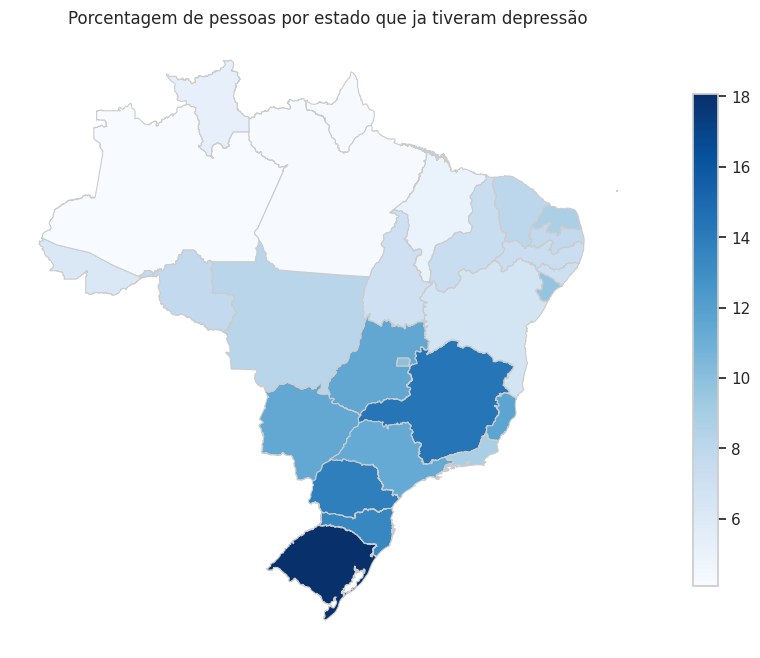

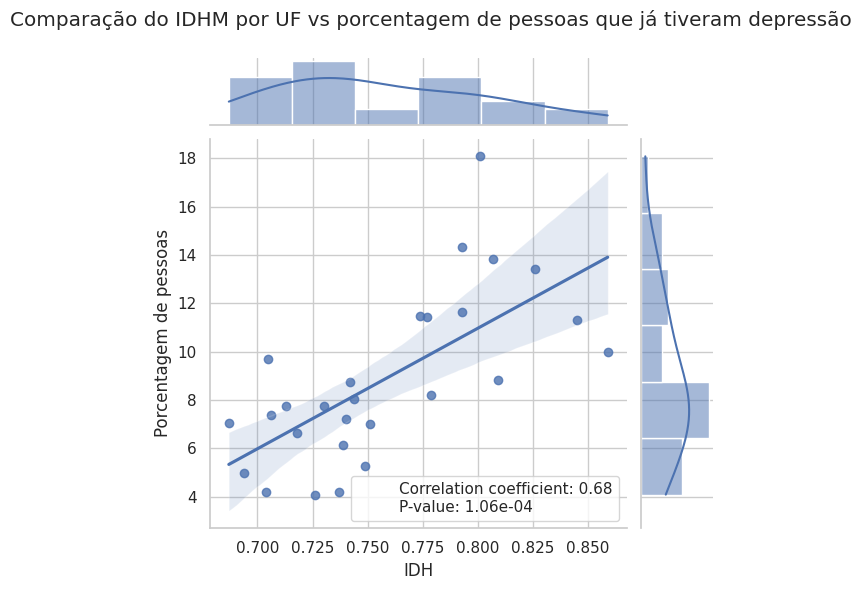

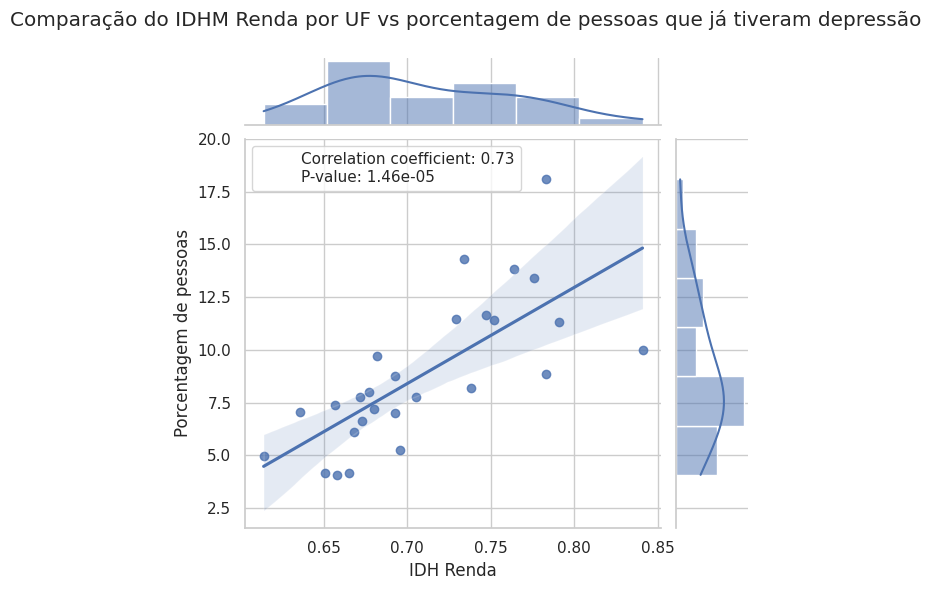

In [24]:
selected = df[['uf']][df['teve_depre'].isin([1])].value_counts() * 100 / df[['uf']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de pessoas por estado que ja tiveram depressão", uf_key='uf')

selected2 = BRAZIL_IDH.merge(selected, left_on='codigo_ibg', right_on='uf')

plot_correlation(selected2, x='IDHM', y='values',
                 title='Comparação do IDHM por UF vs porcentagem de pessoas que já tiveram depressão',
                 xlabel='IDH', ylabel='Porcentagem de pessoas')

plot_correlation(selected2, x='IDHM Renda', y='values',
                 title='Comparação do IDHM Renda por UF vs porcentagem de pessoas que já tiveram depressão',
                 xlabel='IDH Renda', ylabel='Porcentagem de pessoas')

In [21]:
selected2

,name,codigo_ibg,Territorialidade,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade,uf,values
0,Acre,12,Acre,17,0.739,21,0.668,16,0.728,13,0.830,12,6.134454
1,Alagoas,27,Alagoas,27,0.687,26,0.636,26,0.643,21,0.793,27,7.063944
2,Amazonas,13,Amazonas,20,0.726,23,0.658,13,0.735,23,0.792,13,4.081633
3,Amapá,16,Amapá,18,0.737,22,0.665,16,0.728,14,0.828,16,4.182754
4,Bahia,29,Bahia,21,0.718,19,0.673,24,0.672,17,0.818,29,6.641159
5,Ceará,23,Ceará,14,0.744,18,0.677,12,0.740,16,0.823,23,8.018757
6,Espírito Santo,32,Espírito Santo,7,0.793,8,0.747,11,0.741,2,0.902,32,11.635131
7,Goiás,52,Goiás,11,0.774,11,0.729,7,0.770,15,0.827,52,11.472983
8,Maranhão,21,Maranhão,26,0.694,27,0.614,20,0.704,27,0.773,21,4.960630
9,Minas Gerais,31,Minas Gerais,7,0.793,10,0.734,7,0.770,6,0.883,31,14.321367


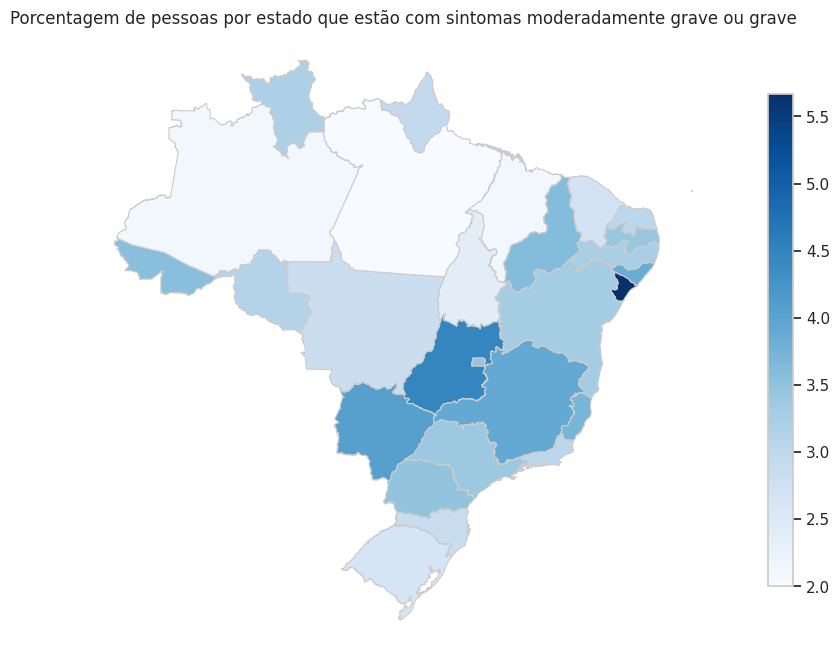

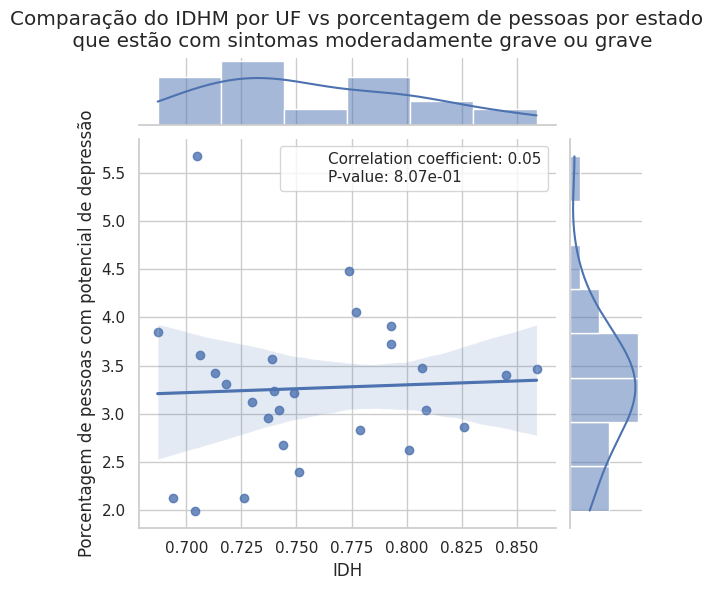

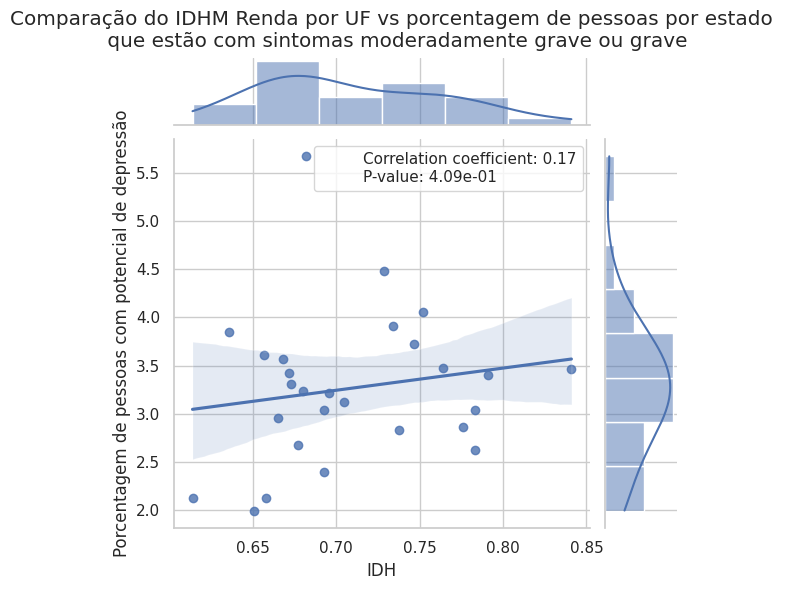

In [25]:
plt.show()
selected = df[['uf']][df['depression_severity'].isin([4, 5])].value_counts() * 100 / df[['uf']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de pessoas por estado que estão com sintomas moderadamente grave ou grave", uf_key='uf')

selected2 = BRAZIL_IDH.merge(selected, left_on='codigo_ibg', right_on='uf')

plot_correlation(selected2, x='IDHM', y='values',
                 title='Comparação do IDHM por UF vs porcentagem de pessoas por estado \n que estão com sintomas moderadamente grave ou grave',
                 xlabel='IDH', ylabel='Porcentagem de pessoas com potencial de depressão')

plot_correlation(selected2, x='IDHM Renda', y='values',
                 title='Comparação do IDHM Renda por UF vs porcentagem de pessoas por estado \n que estão com sintomas moderadamente grave ou grave',
                 xlabel='IDH', ylabel='Porcentagem de pessoas com potencial de depressão')